In [ ]:
!pip install ta
!pip install pandas_ta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import pandas_ta as ta
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import mixture as mix

In [ ]:
#df =pd.read_excel('btc_18_22_1h.xlsx')
df =pd.read_csv('btc_18_22_15m.csv')

cols = df.columns + '_l'
#h_10 = pd.DataFrame( [ df.iloc[i].to_list()  for i in range(0 , len(df) , 10) ] ,  columns = cols )
h_10 =pd.read_csv('btc_18_22_4h.csv' )
h_10.rename( columns = { 'datetime' : 'datetime_l' , 'open':'open_l' , 'high':'high_l' , 'low' : 'low_l' , 'close':'close_l', 'volume': 'volume_l'} , inplace = True)

h_10['supertrend_l'] = ta.supertrend(high=h_10.high_l,low = h_10.low_l,close = h_10.close_l,length = 10 ,multiplier = 3)['SUPERT_10_3.0']
h_10['signal_l'] = np.where(h_10['close_l']>h_10['supertrend_l'],1 , np.nan)
h_10['signal_l'] = np.where(h_10['close_l']<h_10['supertrend_l'],-1 , h_10['signal_l'])
h_10['supb_l'] = np.where(h_10['signal_l'] == 1 , h_10['supertrend_l'] , np.nan)
h_10['sups_l'] = np.where(h_10['signal_l'] == -1 , h_10['supertrend_l'] , np.nan)
#df['date'] =  [ str(df['datetime'].iloc[i])[0:10] for i in range(len(df))  ]

df['datetime'] = [str(df['datetime'].iloc[i])  for i in range(len(df)) ]
df = df.join(h_10.set_index('datetime_l' , drop = True ), on = 'datetime' )
df.fillna( method= 'ffill' , inplace = True )
#df['signal_l'] = df['signal_l'].fillna(method= 'ffill' , inplace = True )

df['supertrend_s'] = ta.supertrend(high=df.high,low = df.low,close = df.close,length = 10 ,multiplier = 3)['SUPERT_10_3.0']
df['signal_s'] = np.where(df['close']>df['supertrend_s'],1 , np.nan)
df['signal_s'] = np.where(df['close']<df['supertrend_s'],-1 , df['signal_s'])
df['supb_s'] = np.where(df['signal_s'] == 1 , df['supertrend_s'] , np.nan)
df['sups_s'] = np.where(df['signal_s'] == -1 , df['supertrend_s'] , np.nan)

df

,datetime,open,high,low,close,volume,open_l,high_l,low_l,close_l,volume_l,supertrend_l,signal_l,supb_l,sups_l,supertrend_s,signal_s,supb_s,sups_s
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13556.15,123.616013,13715.65,13715.65,13155.38,13410.03,1676.204807,0.000000,1.0,0.000000,NaN,0.000000,1.0,0.000000,NaN
1,2018-01-01 05:45:00,13533.75,13550.87,13402.00,13521.12,98.136430,13715.65,13715.65,13155.38,13410.03,1676.204807,0.000000,1.0,0.000000,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 06:00:00,13500.00,13545.37,13450.00,13470.41,79.904037,13715.65,13715.65,13155.38,13410.03,1676.204807,0.000000,1.0,0.000000,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 06:15:00,13494.65,13690.87,13450.00,13529.01,141.699719,13715.65,13715.65,13155.38,13410.03,1676.204807,0.000000,1.0,0.000000,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 06:30:00,13528.99,13571.74,13402.28,13445.63,72.537533,13715.65,13715.65,13155.38,13410.03,1676.204807,0.000000,1.0,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174669,2022-12-31 04:30:00,16582.81,16599.82,16568.00,16593.88,1710.266190,16525.91,16677.35,16523.91,16607.48,24063.452570,16802.382899,-1.0,17456.945456,16802.382899,16518.489720,1.0,16518.489720,NaN
174670,2022-12-31 04:45:00,16593.88,16599.73,16586.94,16595.48,904.073200,16525.91,16677.35,16523.91,16607.48,24063.452570,16802.382899,-1.0,17456.945456,16802.382899,16518.489720,1.0,16518.489720,NaN
174671,2022-12-31 05:00:00,16595.03,16618.58,16589.96,16615.56,1374.843200,16525.91,16677.35,16523.91,16607.48,24063.452570,16802.382899,-1.0,17456.945456,16802.382899,16528.130366,1.0,16528.130366,NaN
174672,2022-12-31 05:15:00,16615.97,16618.75,16598.58,16607.48,997.158880,16525.91,16677.35,16523.91,16607.48,24063.452570,16802.382899,-1.0,17456.945456,16802.382899,16534.088329,1.0,16534.088329,NaN


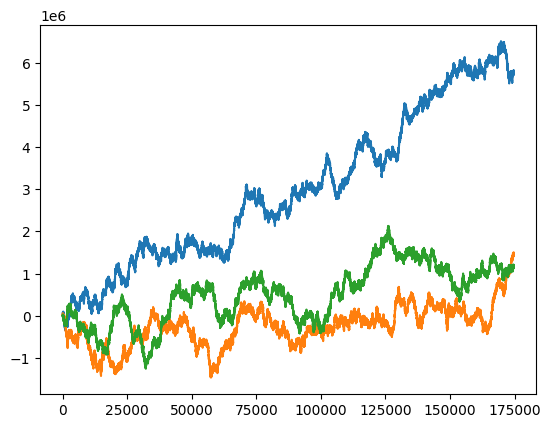

In [ ]:
df['pct_change'] = df.close.pct_change()*100
df['pct_change_o'] = df.open.pct_change()*100
df['pct_change_h'] = df.high.pct_change()*100
df['pct_change_l'] = df.low.pct_change()*100
mean_ = np.mean(df['pct_change'])
std_ = np.std(df['pct_change'])

import random
distribution = np.random.normal(mean_,std_,200000)

def carlo () :
  synthetic_data = np.random.choice(distribution,174674)
  df['synt_ret'] = synthetic_data
  df['synt_ret'] =  df['synt_ret'].cumsum()
  df['synt_price']= df.close.iloc[0]*df['synt_ret']
  df['synt_price']  = df['synt_price'].astype(float).astype(int)
  return  df['synt_price']


plt.figure()
for i in range(3) :
  plt.plot( carlo() )

In [ ]:
# calculating Lookforward Mean and Std

df[['mean' , 'std']] = 0
for i in range(len(df)) :
  if i >=1000 :
    df['mean'].iloc[i] = df['pct_change'].iloc[i-1000 : i + 1001].mean().copy()
    df['std'].iloc[i] = df['pct_change'].iloc[i-1000 : i + 1001].std().copy()

  elif  i < 1000  :
    df['mean'].iloc[i] = df['pct_change'].iloc[0 : i + 1001].mean().copy()
    df['std'].iloc[i] = df['pct_change'].iloc[0 : i + 1001].std().copy()

  elif i > (len(df)-1000)  :
    df['mean'].iloc[i] = df['pct_change'].iloc[i-1000:-1].mean().copy()
    df['std'].iloc[i] = df['pct_change'].iloc[i-1000 :-1].std().copy()


dff = df[['mean' , 'std']].copy()

# Define and fir StandardScaler model
ss= StandardScaler()
# Define GuassianMixture model
unsup = mix.GaussianMixture( n_components = 4 , \
                      covariance_type = 'spherical' ,\
                      n_init = 100 ,\
                      random_state = 42)

# Fit GuassianMixture model & Predict \
# Regime by unsup and assigh to dataframe

unsup.fit(  ss.fit_transform(dff) )
regime = unsup.predict( ss.transform(dff) )

df['regime'] = regime
df

<ipython-input-6-5e42bcf4be03>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'].iloc[i] = df['pct_change'].iloc[0 : i + 1001].mean().copy()
<ipython-input-6-5e42bcf4be03>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'].iloc[i] = df['pct_change'].iloc[0 : i + 1001].std().copy()


,datetime,open,high,low,close,volume,open_l,high_l,low_l,close_l,...,sups_s,pct_change,pct_change_o,pct_change_h,pct_change_l,synt_ret,synt_price,mean,std,regime
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13556.15,123.616013,13715.65,13715.65,13155.38,13410.03,...,NaN,NaN,NaN,NaN,NaN,-0.641120,-8691,0.002702,0.890256,3
1,2018-01-01 05:45:00,13533.75,13550.87,13402.00,13521.12,98.136430,13715.65,13715.65,13155.38,13410.03,...,NaN,-0.258407,-1.326222,-1.201401,0.014851,-0.921471,-12491,0.004539,0.891706,3
2,2018-01-01 06:00:00,13500.00,13545.37,13450.00,13470.41,79.904037,13715.65,13715.65,13155.38,13410.03,...,NaN,-0.375043,-0.249377,-0.040588,0.358155,-0.867106,-11754,0.004098,0.891369,3
3,2018-01-01 06:15:00,13494.65,13690.87,13450.00,13529.01,141.699719,13715.65,13715.65,13155.38,13410.03,...,NaN,0.435028,-0.039630,1.074168,0.000000,-1.028417,-13941,0.004814,0.891213,3
4,2018-01-01 06:30:00,13528.99,13571.74,13402.28,13445.63,72.537533,13715.65,13715.65,13155.38,13410.03,...,NaN,-0.616305,0.254471,-0.870142,-0.354796,-0.804986,-10912,0.005778,0.891292,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174669,2022-12-31 04:30:00,16582.81,16599.82,16568.00,16593.88,1710.266190,16525.91,16677.35,16523.91,16607.48,...,NaN,0.063980,-0.034843,0.044237,-0.078765,84.783676,1149340,-0.001296,0.097497,1
174670,2022-12-31 04:45:00,16593.88,16599.73,16586.94,16595.48,904.073200,16525.91,16677.35,16523.91,16607.48,...,NaN,0.009642,0.066756,-0.000542,0.114317,84.637673,1147360,-0.001282,0.097544,1
174671,2022-12-31 05:00:00,16595.03,16618.58,16589.96,16615.56,1374.843200,16525.91,16677.35,16523.91,16607.48,...,NaN,0.120997,0.006930,0.113556,0.018207,85.147652,1154274,-0.001266,0.097591,1
174672,2022-12-31 05:15:00,16615.97,16618.75,16598.58,16607.48,997.158880,16525.91,16677.35,16523.91,16607.48,...,NaN,-0.048629,0.126182,0.001023,0.051959,85.312788,1156512,-0.001314,0.097628,1


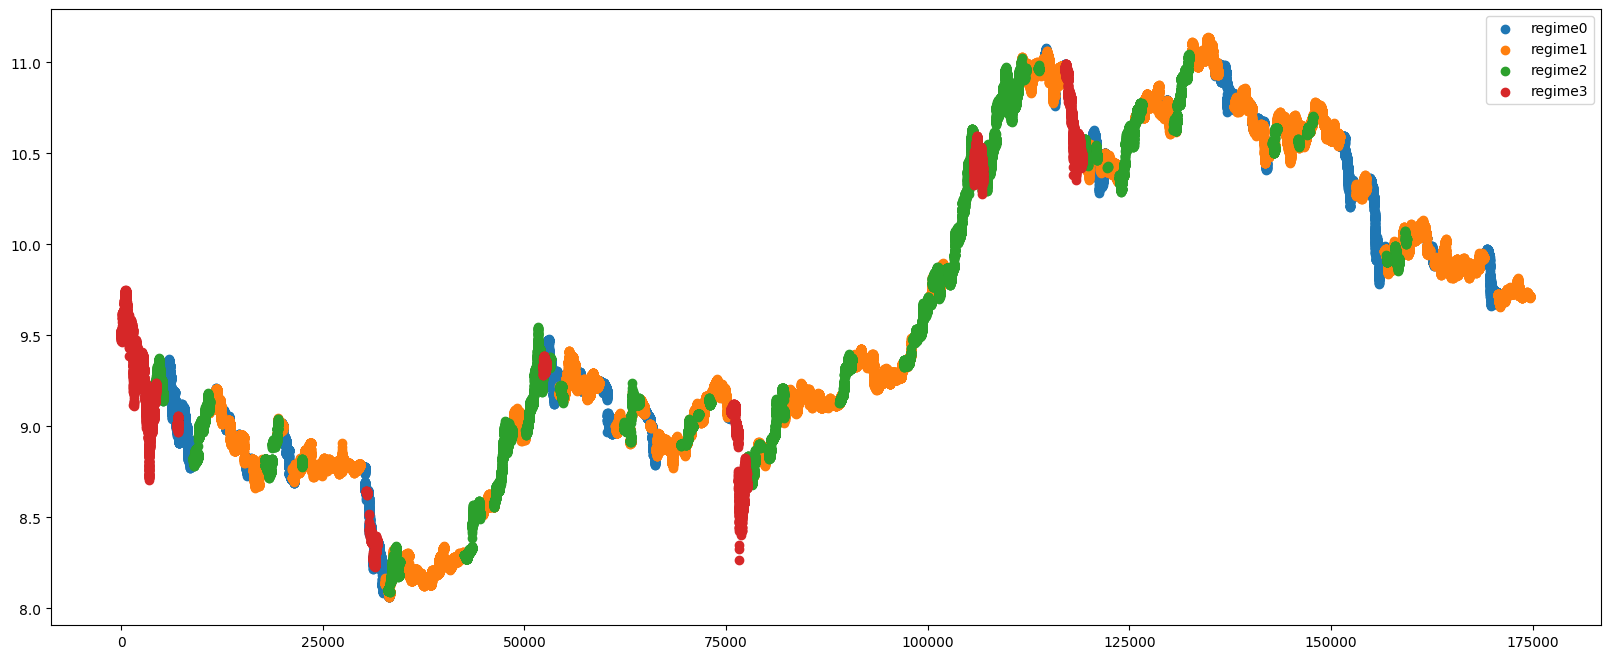

In [ ]:
# Plotting Regime on LOG Close Prices

df['log_close'] = np.log(df.close)
df['regime1'] = np.where( df.regime ==0 , df.log_close , np.nan)
df['regime2'] = np.where( df.regime ==1 , df.log_close , np.nan)
df['regime3'] = np.where( df.regime ==2 , df.log_close , np.nan)
df['regime4'] = np.where( df.regime ==3 , df.log_close , np.nan)
plt.figure(figsize =( 20,8))
plt.scatter ( df.index , df['regime1']  )
plt.scatter ( df.index , df['regime2']  )
plt.scatter ( df.index , df['regime3']  )
plt.scatter ( df.index , df['regime4']  )
plt.legend(['regime0','regime1' , 'regime2' , 'regime3'])

(array([1.355e+03, 1.111e+03, 9.640e+02, 8.100e+02, 6.420e+02, 5.630e+02,
        5.190e+02, 4.140e+02, 3.570e+02, 3.210e+02, 2.800e+02, 2.350e+02,
        2.340e+02, 1.750e+02, 1.760e+02, 1.540e+02, 1.320e+02, 9.900e+01,
        1.120e+02, 8.800e+01, 9.700e+01, 9.700e+01, 4.700e+01, 7.100e+01,
        6.000e+01, 4.800e+01, 4.900e+01, 4.800e+01, 4.500e+01, 4.800e+01,
        3.100e+01, 3.100e+01, 2.800e+01, 3.500e+01, 2.200e+01, 2.000e+01,
        2.400e+01, 1.600e+01, 2.600e+01, 2.100e+01, 2.000e+01, 1.300e+01,
        2.400e+01, 2.200e+01, 1.700e+01, 1.300e+01, 1.000e+01, 1.100e+01,
        7.000e+00, 1.800e+01, 1.100e+01, 5.000e+00, 1.600e+01, 8.000e+00,
        9.000e+00, 1.100e+01, 4.000e+00, 5.000e+00, 6.000e+00, 5.000e+00,
        3.000e+00, 5.000e+00, 6.000e+00, 4.000e+00, 4.000e+00, 3.000e+00,
        4.000e+00, 6.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 5.000e+00,
        5.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 3.000e+00, 3.000e+0

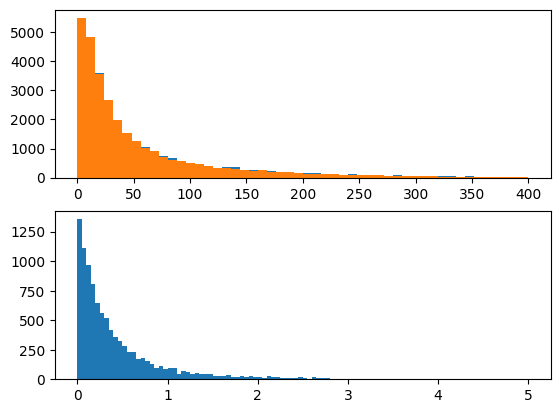

In [ ]:
c_r = 0
df_0 = df[df.regime==c_r]
h_sp = (df_0.high - df_0.close)
plt.subplot(2,1,1)
plt.hist( h_sp , bins = 50 , range = [0,400])

df_0 = df[df.regime==c_r]
h_sp = (df_0.close - df_0.low)
plt.hist( h_sp , bins = 50 , range = [0,400])

# Try to fit pareto distribution by giving alpha and Xm
plt.subplot(2,1,2)
shape,mode = 3, 1   #  shape  , mode
plt.hist((np.random.pareto(shape, 10000) + 0) * mode , bins = 100  , range = [0,5]  )

<ipython-input-51-575921616186>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['syn'].iloc[0] = 1
<ipython-input-51-575921616186>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['syn'].iloc[0] = 1
<ipython-input-51-575921616186>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['syn'].iloc[0] = 1
<ipython-input-51-575921616186>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


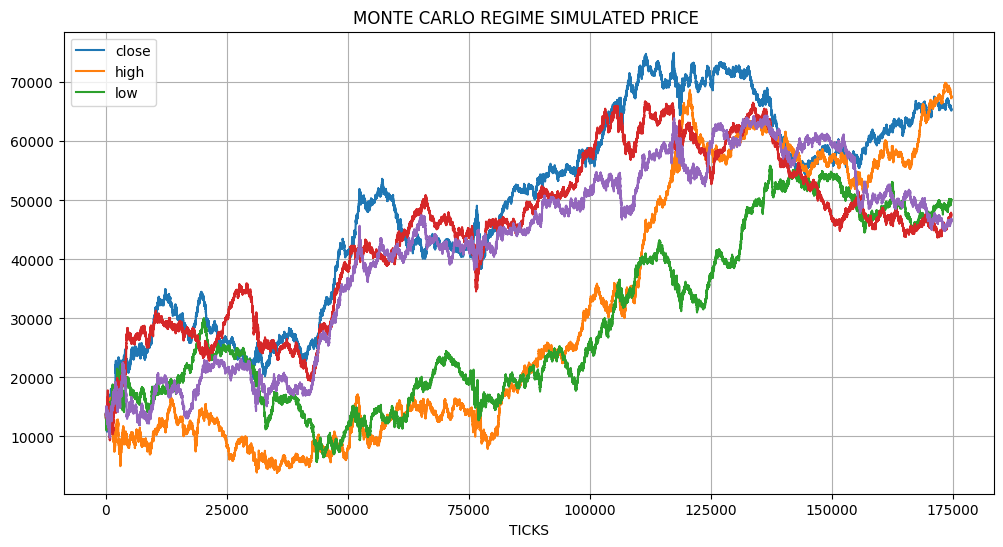

In [ ]:
simulated_dict = {}
plt.figure(figsize = (12,6))
for i in range(0,5) :

  len_rg0, len_rg1,len_rg2,len_rg3  = df.regime.value_counts().sort_index().to_list()

  mean_0,std_0 = df[df.regime == 0]['pct_change'].mean(),df[df.regime == 0]['pct_change'].std()
  mean_1,std_1= df[df.regime == 1]['pct_change'].mean(),df[df.regime == 1]['pct_change'].std()
  mean_2 , std_2 = df[df.regime == 2]['pct_change'].mean(),df[df.regime == 2]['pct_change'].std()
  mean_3,std_3 = df[df.regime == 3]['pct_change'].mean(),df[df.regime == 3]['pct_change'].std()

  distribution0 = np.random.normal(mean_0,std_0, 100000)
  distribution1 = np.random.normal(mean_1,std_1, 100000)
  distribution2 = np.random.normal(mean_2,std_2, 100000)
  distribution3 = np.random.normal(mean_3,std_3, 100000)

  df_0 = df[df.regime==0].copy()
  h_sp_0,l_sp_0 = (df_0.high - df_0.close),(df_0.close - df_0.low)
  df_0 = df[df.regime==1].copy()
  h_sp_1,l_sp_1 = (df_0.high - df_0.close),(df_0.close - df_0.low)
  df_0 = df[df.regime==2].copy()
  h_sp_2,l_sp_2= (df_0.high - df_0.close),(df_0.close - df_0.low)
  df_0 = df[df.regime==3].copy()
  h_sp_3,l_sp_3 = (df_0.high - df_0.close),(df_0.close - df_0.low)

  synthetic_data_0 = np.random.choice(distribution0, len_rg0 )
  synthetic_data_1 = np.random.choice(distribution1, len_rg1 )
  synthetic_data_2 = np.random.choice(distribution2, len_rg2 )
  synthetic_data_3 = np.random.choice(distribution3,  len_rg3 )

  synthetic_h_sp_0 ,synthetic_l_sp_0 = np.random.choice(h_sp_0, len_rg0 ) , np.random.choice(l_sp_0, len_rg0 )
  synthetic_h_sp_1 ,synthetic_l_sp_1 = np.random.choice(h_sp_1, len_rg1 ) , np.random.choice(l_sp_1, len_rg1 )
  synthetic_h_sp_2 ,synthetic_l_sp_2 = np.random.choice(h_sp_2, len_rg2 ) , np.random.choice(l_sp_2, len_rg2 )
  synthetic_h_sp_3 ,synthetic_l_sp_3 = np.random.choice(h_sp_3, len_rg3 ) , np.random.choice(l_sp_3, len_rg3 )

  df['syn'] = 0
  #for i,j in enumerate(df[df.regime ==0].index ) :
  #  df['syn'].iloc[j] = synthetic_data_0[i]
  #for i,j in enumerate(df[df.regime ==1].index ) :
  #  df['syn'].iloc[j] = synthetic_data_1[i]
  #for i,j in enumerate(df[df.regime ==2].index ) :
  #  df['syn'].iloc[j] = synthetic_data_2[i]
  #for i,j in enumerate(df[df.regime ==3].index ) :
  #  df['syn'].iloc[j] = synthetic_data_3[i]

  dist0 = list(zip( df[df['regime'] == 0].index , synthetic_data_0[0: len_rg0], synthetic_h_sp_0 , synthetic_l_sp_0 ))
  dist1 = list(zip( df[df['regime'] == 1].index , synthetic_data_1[0:len_rg1], synthetic_h_sp_1 ,synthetic_l_sp_1 ))
  dist2 = list(zip( df[df['regime'] == 2].index , synthetic_data_2[0:len_rg2], synthetic_h_sp_2 ,synthetic_l_sp_2 ))
  dist3 = list(zip( df[df['regime'] == 3].index , synthetic_data_3[0:len_rg3], synthetic_h_sp_3 ,synthetic_l_sp_3  ))

  #  zip > (index  open high  low  close  )
  #dist0 = list(zip( df[df['regime'] == 0].index , synthetic_data_0[0:4*len_rg0:4] ,synthetic_data_0[1:4*len_rg0:4] , \
  #                                        synthetic_data_0[2:4*len_rg0:4] , synthetic_data_0[3:4*len_rg0:4] )  )

  #dist1 = list(zip( df[df['regime'] == 1].index , synthetic_data_1[0:4*len_rg1:4] ,synthetic_data_1[1:4*len_rg1:4] , \
  #                                        synthetic_data_1[2:4*len_rg1:4] , synthetic_data_1[3:4*len_rg1:4] )  )

  #dist2 = list(zip( df[df['regime'] == 2].index , synthetic_data_2[0:4*len_rg2:4] ,synthetic_data_2[1:4*len_rg2:4] , \
  #                                        synthetic_data_2[2:4*len_rg2:4] , synthetic_data_2[3:4*len_rg2:4] )  )

  #dist3 = list(zip( df[df['regime'] == 3].index , synthetic_data_3[0:4*len_rg3:4] ,synthetic_data_3[1:4*len_rg3:4] , \
  #                                        synthetic_data_3[2:4*len_rg3:4] , synthetic_data_3[3:4*len_rg3:4] )  )

  dist_ = 0
  dist_ = dist0  + dist1 + dist2 + dist3
  #cols = ['index' , 'syn' , 'syn_o' , 'syn_h' , 'syn_l']
  #cols1 = ['syn' , 'syn_o' , 'syn_h' , 'syn_l']
  df[['syn','h_sp' , 'l_sp']] = pd.DataFrame(dist_ , columns = ['index' , 'syn' , 'h_sp' , 'l_sp'] ).\
              set_index(  'index' , drop = True).sort_values('index')[['syn' , 'h_sp' , 'l_sp']]


  df['syn'] = df['syn'].cumsum()
  df['syn'].iloc[0] = 1

  plt.plot(round( (df.syn*df.close.iloc[0])/100 + df.close.iloc[0] ,2) )
  #plt.plot(round( (df.syn_o*df.open.iloc[0])/100 + df.close.iloc[0] ,2) )
  #plt.plot(round( (df.syn*df.close.iloc[0])/100 + df.close.iloc[0] + df.h_sp ,2) )
  #plt.plot(round( (df.syn*df.close.iloc[0])/100 + df.close.iloc[0] - df.l_sp ,2) )
  plt.xlabel('TICKS')
  plt.title('MONTE CARLO REGIME SIMULATED PRICE ')
  plt.legend(['close','high','low'])
  plt.grid()

  s_df = pd.DataFrame()
  s_df['datetime'],s_df['close'],s_df['high'],s_df['low'] =  df['datetime']  , \
                                                       round( (df.syn*df.close.iloc[0])/100 + df.close.iloc[0] ,2) ,  \
                                                       round( (df.syn*df.close.iloc[0])/100 + df.close.iloc[0] + df.h_sp ,2) ,\
                                                       round( (df.syn*df.close.iloc[0])/100 + df.close.iloc[0] - df.l_sp ,2)



  simulated_dict.update(  { 'simulated{}'.format(i) : s_df   })



In [ ]:
simulated_dict

{'simulated0':                    datetime     close      high       low
 0       2018-01-01 05:30:00  13691.71  13771.71  13690.09
 1       2018-01-01 05:45:00  13456.11  13569.05  13315.76
 2       2018-01-01 06:00:00  13362.38  13447.38  13345.21
 3       2018-01-01 06:15:00  13521.51  13552.41  13519.52
 4       2018-01-01 06:30:00  13355.64  13366.96  13254.66
 ...                     ...       ...       ...       ...
 174669  2022-12-31 04:30:00  65281.63  65290.91  65252.54
 174670  2022-12-31 04:45:00  65267.96  65271.10  65248.49
 174671  2022-12-31 05:00:00  65204.36  65221.14  65190.32
 174672  2022-12-31 05:15:00  65231.33  65232.52  65152.23
 174673  2022-12-31 05:30:00  65241.33  65243.28  65236.71
 
 [174674 rows x 4 columns],
 'simulated1':                    datetime     close      high       low
 0       2018-01-01 05:30:00  13691.71  13742.34  13623.70
 1       2018-01-01 05:45:00  13554.34  13635.08  13456.65
 2       2018-01-01 06:00:00  13525.39  13527.45  13452.6

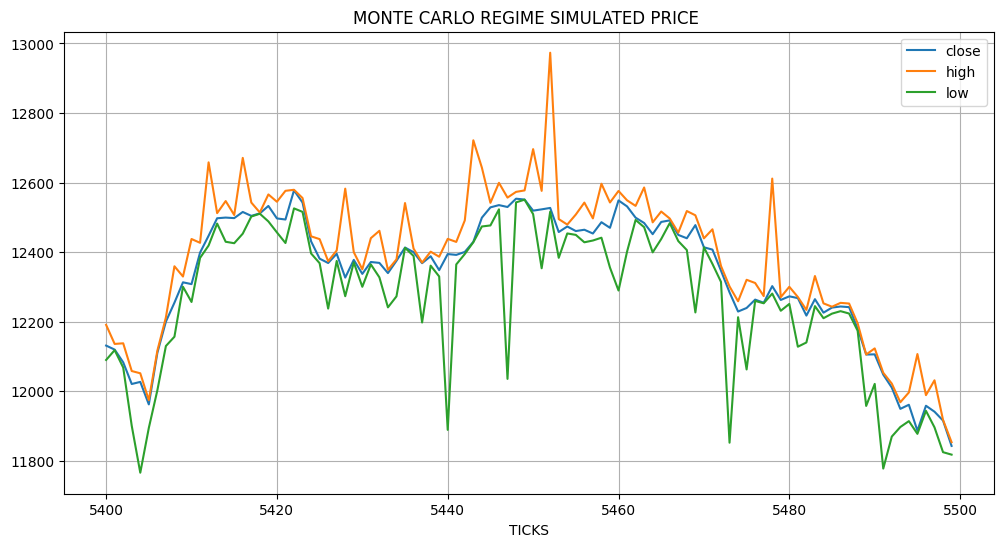

In [ ]:
dff =df[5400:5500].copy()
plt.figure(figsize = (12,6))
plt.plot(round( (dff.syn*dff.close.iloc[0])/100 + dff.close.iloc[0] ,2) )
#plt.plot(round( (df.syn_o*df.open.iloc[0])/100 + df.close.iloc[0] ,2) )
plt.plot(round( (dff.syn*dff.close.iloc[0])/100 + dff.close.iloc[0] + dff.h_sp ,2) )
plt.plot(round( (dff.syn*dff.close.iloc[0])/100 + dff.close.iloc[0] - dff.l_sp ,2) )
plt.xlabel('TICKS')
plt.title('MONTE CARLO REGIME SIMULATED PRICE ')
plt.legend(['close','high','low'])
plt.grid()

In [ ]:
plt.figure(figsize = (12,12))
plt.subplot(2,1,1 )
plt.plot(df.syn*df.log_close.iloc[0])
plt.xlabel('TICKS')
plt.title('MONTE CARLO REGIME SIMULATED PRICE ')
plt.legend(['close'])
plt.grid()
plt.subplot(2,1,2)
plt.plot(df.log_close , color = 'c')
plt.xlabel('TICKS')
plt.title('ACTUAL PRICE')
plt.legend(['close'])
plt.grid()

In [ ]:
plt.figure(figsize = (12,12))
plt.subplot(2,1,1 )
plt.plot(round( (df.syn*df.close.iloc[0])/100 + df.close.iloc[0] ,2) )
plt.xlabel('TICKS')
plt.title('MONTE CARLO REGIME SIMULATED PRICE ')
plt.legend(['close'])
plt.grid()
plt.subplot(2,1,2)
plt.plot(df.close , color = 'c')
plt.xlabel('TICKS')
plt.title('ACTUAL PRICE')
plt.legend(['close'])
plt.grid()

In [ ]:
print(mean_0,std_0)
print(mean_1,std_1)
print(mean_2,std_2)
print(mean_3,std_3)

                   datetime     close      high       low   close_l    high_l  \
0       2018-01-01 05:30:00  13691.71  13771.71  13690.09  13691.71  13771.71   
1       2018-01-01 05:45:00  13456.11  13569.05  13315.76  13691.71  13771.71   
2       2018-01-01 06:00:00  13362.38  13447.38  13345.21  13691.71  13771.71   
3       2018-01-01 06:15:00  13521.51  13552.41  13519.52  13691.71  13771.71   
4       2018-01-01 06:30:00  13355.64  13366.96  13254.66  13691.71  13771.71   
...                     ...       ...       ...       ...       ...       ...   
174669  2022-12-31 04:30:00  65281.63  65290.91  65252.54  65381.32  65390.26   
174670  2022-12-31 04:45:00  65267.96  65271.10  65248.49  65381.32  65390.26   
174671  2022-12-31 05:00:00  65204.36  65221.14  65190.32  65381.32  65390.26   
174672  2022-12-31 05:15:00  65231.33  65232.52  65152.23  65231.33  65232.52   
174673  2022-12-31 05:30:00  65241.33  65243.28  65236.71  65231.33  65232.52   

           low_l  supertren

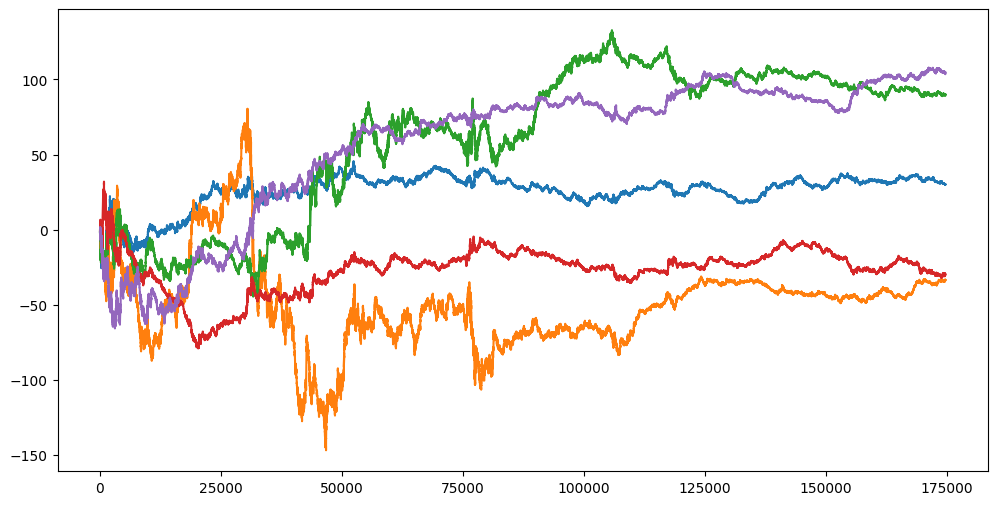

In [ ]:
plt.figure(figsize = (12,6))
for s_p in simulated_dict.keys() :

  dff = simulated_dict[s_p].copy()

  cols = dff.columns + '_l'
  h_10 = pd.DataFrame( [ dff.iloc[i].to_list()  for i in range(0 , len(dff) , 16) ] ,  columns = cols )
  #h_10 =pd.read_csv('btc_18_22_4h.csv' )
  #h_10.rename( columns = { 'datetime' : 'datetime_l' , 'high':'high_l' , 'low' : 'low_l' , 'close':'close_l'} , inplace = True)

  h_10['supertrend_l'] = ta.supertrend(high=h_10.high_l,low = h_10.low_l,close = h_10.close_l,length = 10 ,multiplier = 3)['SUPERT_10_3.0']
  h_10['signal_l'] = np.where(h_10['close_l']>h_10['supertrend_l'],1 , np.nan)
  h_10['signal_l'] = np.where(h_10['close_l']<h_10['supertrend_l'],-1 , h_10['signal_l'])
  h_10['supb_l'] = np.where(h_10['signal_l'] == 1 , h_10['supertrend_l'] , np.nan)
  h_10['sups_l'] = np.where(h_10['signal_l'] == -1 , h_10['supertrend_l'] , np.nan)
  #df['date'] =  [ str(df['datetime'].iloc[i])[0:10] for i in range(len(df))  ]

  dff['datetime'] = [str(dff['datetime'].iloc[i])  for i in range(len(dff)) ]
  dff = dff.join(h_10.set_index('datetime_l' , drop = True ), on = 'datetime' )
  dff.fillna( method= 'ffill' , inplace = True )
  #df['signal_l'] = df['signal_l'].fillna(method= 'ffill' , inplace = True )


  dff['supertrend_s'] = ta.supertrend(high=dff.high,low = dff.low,close = dff.close,length = 10 ,multiplier = 3)['SUPERT_10_3.0']
  dff['signal_s'] = np.where(dff['close']>dff['supertrend_s'],1 , np.nan)
  dff['signal_s'] = np.where(dff['close']<dff['supertrend_s'],-1 , dff['signal_s'])
  dff['supb_s'] = np.where(dff['signal_s'] == 1 , dff['supertrend_s'] , np.nan)
  dff['sups_s'] = np.where(dff['signal_s'] == -1 , dff['supertrend_s'] , np.nan)

  print(dff)
  bb = (dff['signal_l'] == 1.0)  &  (dff['signal_s'] == 1.0 )
  ss =  (dff['signal_l'] == -1.0)  &  (dff['signal_s'] == -1.0 )
  dff['signal'] = np.where( bb , 1, np.nan)
  dff['signal'] = np.where( ss , -1, dff['signal'])
  dff['signal'] = dff['signal'].shift(1)
  dff['c_signal'] = dff['signal']

  dff['pct_change'] = dff['close'].pct_change()*100
  dff['pnl'] = dff['c_signal'].replace(np.nan,0)*dff['pct_change']

  dff['trades'] = np.where( dff.c_signal.replace(np.nan,0) != dff.c_signal.shift(1).replace(np.nan,0) , 1, 0)
  dff['trades'] = np.where( (dff['trades'] == 1)  & (dff.c_signal.replace(np.nan,0) == 0)  , 0 , dff['trades'])

  plt.plot(dff['pnl'].cumsum())


In [ ]:
dff[0:50]

,datetime,close,high,low,close_l,high_l,low_l,supertrend_l,signal_l,supb_l,sups_l,supertrend_s,signal_s,supb_s,sups_s,signal,c_signal,pct_change,pnl,trades
0,2018-01-01 05:30:00,13691.71,13714.08,13661.43,13691.71,13714.08,13661.43,0.0,1.0,0.0,NaN,0.000000,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,0
1,2018-01-01 05:45:00,13493.11,13636.11,13328.14,13691.71,13714.08,13661.43,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-1.450513,-1.450513,1
2,2018-01-01 06:00:00,13780.19,13790.78,13725.86,13691.71,13714.08,13661.43,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.127604,0.000000,0
3,2018-01-01 06:15:00,13780.94,14037.59,13776.04,13691.71,13714.08,13661.43,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005443,0.000000,0
4,2018-01-01 06:30:00,13840.02,14145.22,13549.86,13691.71,13714.08,13661.43,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.428708,0.000000,0
5,2018-01-01 06:45:00,13959.52,14145.24,13939.56,13691.71,13714.08,13661.43,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.863438,0.000000,0
6,2018-01-01 07:00:00,13998.85,14001.52,13917.38,13691.71,13714.08,13661.43,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.281743,0.000000,0
7,2018-01-01 07:15:00,14054.47,14075.32,14030.98,13691.71,13714.08,13661.43,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.397318,0.000000,0
8,2018-01-01 07:30:00,14009.93,14046.61,13381.85,13691.71,13714.08,13661.43,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.316910,-0.000000,0
9,2018-01-01 07:45:00,14037.43,14075.32,13793.43,13691.71,13714.08,13661.43,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.196289,0.000000,0


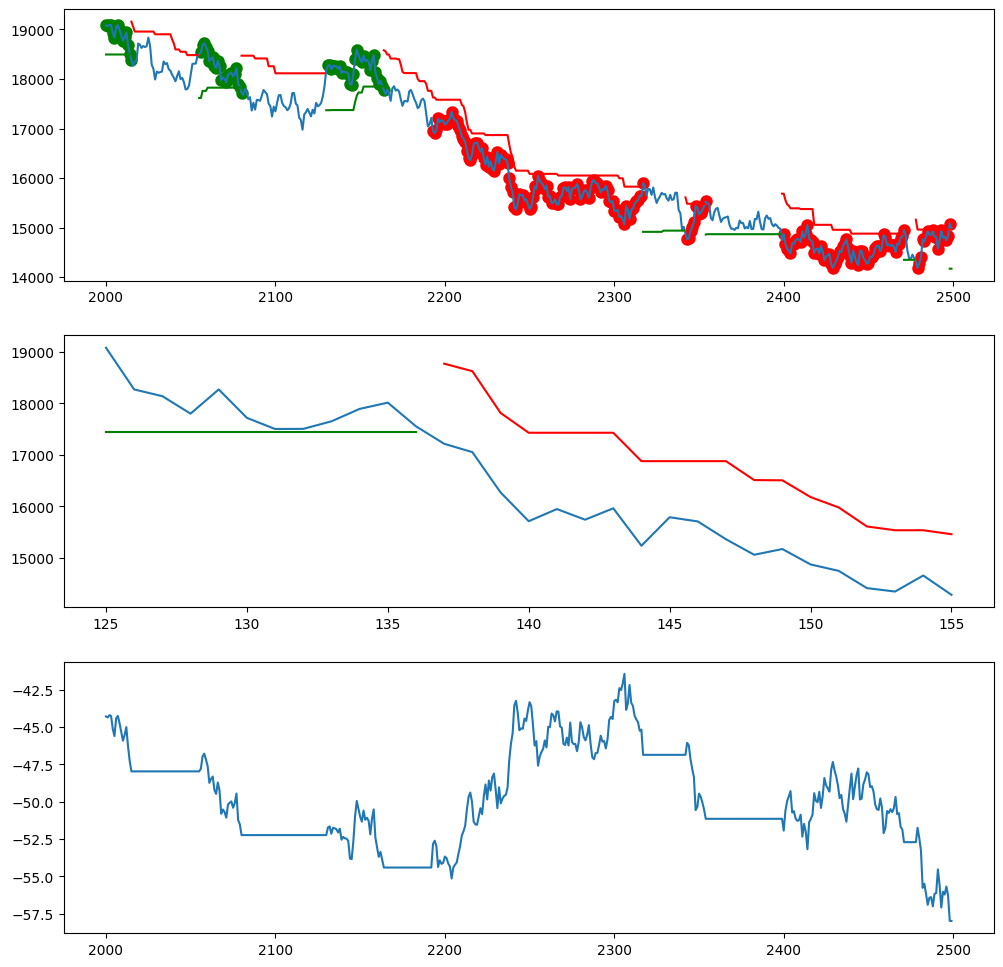

In [ ]:
dff_plt , h10_plt = dff[2000:2500] , h_10[125:156]

plt.figure(figsize = (12,12))
plt.subplot(3,1,1)
plt.plot(dff_plt.close)
plt.plot(dff_plt['supb_s'] , color = 'green')
plt.plot(dff_plt['sups_s'] , color = 'red')
sg = np.abs((dff_plt.c_signal.replace(-1.0 , np.nan).replace(np.nan,0)*dff_plt.close).replace(0,np.nan))
sg1 = np.abs((dff_plt.c_signal.replace(1.0 , np.nan).replace(np.nan,0)*dff_plt.close).replace(0,np.nan))
plt.scatter(dff_plt.index, sg , linewidths = 3  , color = 'green')
plt.scatter(dff_plt.index, sg1 , linewidths = 3  , color = 'red')

plt.subplot(3,1,2)
plt.plot(h10_plt.close_l)
plt.plot(h10_plt.supb_l ,  color = 'green')
plt.plot(h10_plt.sups_l , color = 'red')
#sg1 = np.abs((h10_plt.signal.replace(np.nan,0)*h_10_plt.close).replace(0,np.nan))
#plt.scatter(h10_plt.index, sg ,linewidths = 3 , color = 'green' )

plt.subplot(3,1,3)
#plt.figure(figsize = (12,6))
plt.plot(dff['pnl'].cumsum()[2000:2500])

STRATEGY RETURS104.73220870670838 
BUY&HLD RETURNS 166.31532429585428


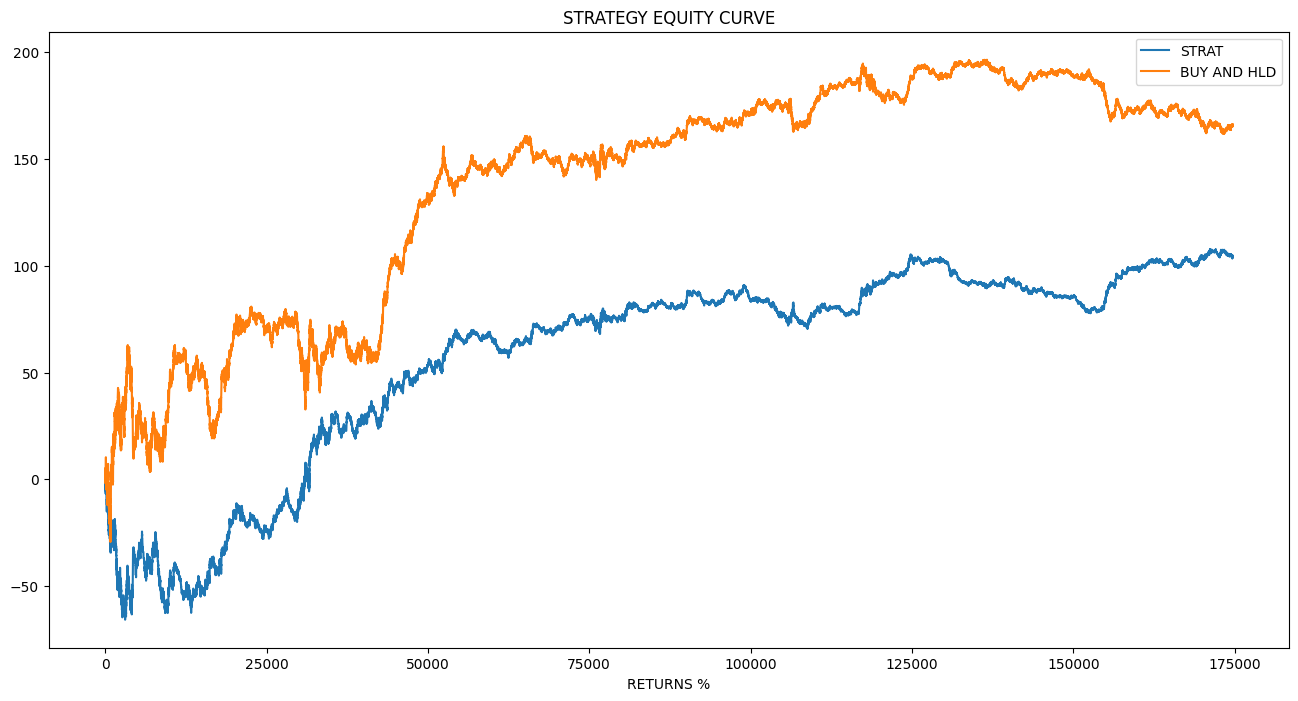

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(dff['pnl'].cumsum())
plt.plot(dff['pct_change'].cumsum())
plt.xlabel( 'TICKS')
plt.xlabel( 'RETURNS %')
plt.title('STRATEGY EQUITY CURVE')
plt.legend( ['STRAT' , 'BUY AND HLD'] )
print( 'STRATEGY RETURS{} '.format(dff['pnl'].cumsum().iloc[-1]) )
print('BUY&HLD RETURNS {}'.format(dff['pct_change'].cumsum().iloc[-1]) )

In [ ]:
bb = (df['signal_l'] == 1.0)  &  (df['signal_s'] == 1.0 )
ss =  (df['signal_l'] == -1.0)  &  (df['signal_s'] == -1.0 )
df['signal'] = np.where( bb , 1, np.nan)
df['signal'] = np.where( ss , -1, df['signal'])
df['signal'] = df['signal'].shift(1)
df['c_signal'] = df['signal']

df['pct_change'] = df['close'].pct_change()*100
df['pnl'] = df['c_signal'].replace(np.nan,0)*df['pct_change']

df['trades'] = np.where( df.c_signal.replace(np.nan,0) != df.c_signal.shift(1).replace(np.nan,0) , 1, 0)
df['trades'] = np.where( (df['trades'] == 1)  & (df.c_signal.replace(np.nan,0) == 0)  , 0 , df['trades'])

In [ ]:
df.trades.value_counts()
len(df) , len(df[df.trades != 0])

In [ ]:
df_plt , h10_plt = df[0:1000] , h_10[0:100]

plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.plot(df_plt.close)
plt.plot(df_plt['supb_s'] , color = 'green')
plt.plot(df_plt['sups_s'] , color = 'red')
sg = np.abs((df_plt.signal.replace(-1.0 , np.nan).replace(np.nan,0)*df_plt.close).replace(0,np.nan))
sg1 = np.abs((df_plt.signal.replace(1.0 , np.nan).replace(np.nan,0)*df_plt.close).replace(0,np.nan))
plt.scatter(df_plt.index, sg , linewidths = 3  , color = 'green')
plt.scatter(df_plt.index, sg1 , linewidths = 3  , color = 'red')

plt.subplot(2,1,2)
plt.plot(h10_plt.close_l)
plt.plot(h10_plt.supb_l ,  color = 'green')
plt.plot(h10_plt.sups_l , color = 'red')
#sg1 = np.abs((h10_plt.signal.replace(np.nan,0)*h_10_plt.close).replace(0,np.nan))
#plt.scatter(h10_plt.index, sg ,linewidths = 3 , color = 'green' )

In [ ]:
2500/16 , 3000/16

In [ ]:
df_plt , h10_plt = df[2500:3000] , h_10[156:187]

plt.figure(figsize = (12,12))
plt.subplot(3,1,1)
plt.plot(df_plt.close)
plt.plot(df_plt['supb_s'] , color = 'green')
plt.plot(df_plt['sups_s'] , color = 'red')
sg = np.abs((df_plt.c_signal.replace(-1.0 , np.nan).replace(np.nan,0)*df_plt.close).replace(0,np.nan))
sg1 = np.abs((df_plt.c_signal.replace(1.0 , np.nan).replace(np.nan,0)*df_plt.close).replace(0,np.nan))
plt.scatter(df_plt.index, sg , linewidths = 3  , color = 'green')
plt.scatter(df_plt.index, sg1 , linewidths = 3  , color = 'red')

plt.subplot(3,1,2)
plt.plot(h10_plt.close_l)
plt.plot(h10_plt.supb_l ,  color = 'green')
plt.plot(h10_plt.sups_l , color = 'red')
#sg1 = np.abs((h10_plt.signal.replace(np.nan,0)*h_10_plt.close).replace(0,np.nan))
#plt.scatter(h10_plt.index, sg ,linewidths = 3 , color = 'green' )

plt.subplot(3,1,3)
#plt.figure(figsize = (12,6))
plt.plot(df['pnl'].cumsum()[2500:3000])

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(df['pnl'].cumsum())
plt.plot(df['pct_change'].cumsum())
plt.xlabel( 'TICKS')
plt.xlabel( 'RETURNS %')
plt.title('STRATEGY EQUITY CURVE')
plt.legend( ['STRAT' , 'BUY AND HLD'] )
print( 'STRATEGY RETURS{} '.format(df['pnl'].cumsum().iloc[-1]) )
print('BUY&HLD RETURNS {}'.format(df['pct_change'].cumsum().iloc[-1]) )

In [ ]:
feature_list = []
for i in range(len(df)) :

  if df.trades.iloc[i] == 1 :
    len_switches_s = len( np.abs(df.signal_s[i-1000:i].diff()).value_counts()  )
    if (len_switches_s != 1) and (len_switches_s != 0) :
      sup_switches_s = np.abs(df.signal_s[i-1000:i].diff()).value_counts()[2.0]
    else :
      sup_switches_s = 0
    #print(np.abs(df.signal_l[i-1000:].diff()).value_counts())
    len_switches_l = len(  np.abs(df.signal_l[i-1000:i].diff()).value_counts()  )
    if (len_switches_l != 1)  and (len_switches_l != 0)  :
      sup_switches_l = np.abs(df.signal_l[i-1000:i].diff()).value_counts()[2.0]
    else  :
      sup_switches_l = 0


    len_ohlc = len(df.high.iloc[i-1000:i])
    if (len_ohlc != 1) and ( len_ohlc != 0) :
      atr = ta.atr(high = df.high.iloc[i-1000:i] , low = df.low.iloc[i-1000:i] ,close =df.close.iloc[i-1000:i], length = 14 ).iloc[-1]
      adx = ta.adx(high = df.high.iloc[i-1000:i] , low = df.low.iloc[i-1000:i] ,close =df.close.iloc[i-1000:i], length = 14 ).iloc[-1]['ADX_14']
      ema = np.abs( (df.close.iloc[-1] -  ta.ema(close = df.close.iloc[i-1000:i] , length = 10 ).iloc[-1])/df.close.iloc[-1] )
      volume = df.volume.iloc[i-1]
      pre_price_move = (df.close.iloc[i-1000:i].pct_change()*100).cumsum().iloc[-1]
      dist_supertrend_s = (np.abs( df.close.iloc[i-1] - df.supertrend_s.iloc[i-1] )/df.close.iloc[i-1])*100
      dist_supertrend_l = (np.abs( df.close.iloc[i-1] - df.supertrend_l.iloc[i-1] )/df.close.iloc[i-1])*100
      volatility = ((df.close.iloc[i-30:i].pct_change()*100).std())*np.sqrt(252)

    else :
      atr , volume , volatility,adx, ema,pre_price_move,dist_supertrend_s,dist_supertrend_l= 0,0,0,0,0,0,0,0

    if np.abs( df['c_signal'].iloc[i] - df['c_signal'].iloc[i-1] ) == 2 :
      direct_sw_bool = 1
    else :
      direct_sw_bool = 0
    if len(df.iloc[i-1000:i]) != 0 :
      prev_pnl = df.pnl.iloc[i-1000:i].cumsum().iloc[-1]
    else:
      prev_pnl = 0
    if len(df.trades.iloc[i+1:][df.trades == 1]) != 0 :
      trade_end_point = df.trades.iloc[i+1:][df.trades == 1].index[0]
      meta_label = np.sign(df.pnl.iloc[i : trade_end_point +1 ].cumsum().iloc[-1])
      meta_label_value= df.pnl.iloc[i : trade_end_point +1 ].cumsum().iloc[-1]
    else :
      meta_label = 0

    if len(df.trades.iloc[:i][df.trades == 1]) !=0 :
      prev_trade_point = df.trades.iloc[:i][df.trades == 1].index[-1]
      prev_trade_sign = df.pnl.iloc[ prev_trade_point : i ].cumsum().iloc[-1]
      prev_trade_bars = (i-1)  - prev_trade_point
    else :
      prev_trade_sign , prev_trade_bars = 0 , 0



    target =  1 if df.c_signal.iloc[i] == 1.0  else ( -1.0  if df.c_signal.iloc[i] == -1.0  else 0 )

    feature_list.append( [ sup_switches_s,sup_switches_l,pre_price_move ,dist_supertrend_s, \
                           dist_supertrend_l , atr , adx , ema,volume , direct_sw_bool , prev_pnl,\
                           volatility, prev_trade_sign , prev_trade_bars ,meta_label,meta_label_value,target ]   )




feature_df = pd.DataFrame(feature_list , columns = ['sup_switches_s', 'sup_switches_l' , 'pre_prices_move' , \
                                                    'dist_supertrend_s', 'dist_supertrend_l', 'atr','adx','ema','volume' , \
                                                    'direct_sw_bool' , 'prev_pnl' ,'volatility','prev_trade_sign' ,
                                                    'prev_trade_bars' ,'meta_label','meta_label_value', 'target'  ]   )

feature_df = feature_df[20:]
feature_df

In [ ]:
"""
no of suptrend switches
% move before signal
Distance of price from supertrend
ATR
larger trend bars
buy to sell or sell to buy directly  bool :

"""

In [ ]:
plt.figure(figsize = (12,6))
plt.hist(feature_df.atr , bins = 100)

In [ ]:
ppt = feature_df[['target' , 'meta_label']]
ppt['correct'] = np.where( ppt.target == ppt.meta_label , 1 , 0)
len(ppt[ppt['correct'] == 1])/len(ppt)

In [ ]:
plt.hist((feature_df.target*feature_df.meta_label_value),bins = 50 , density = True , range = [-10,10 ] , histtype = 'step')

In [ ]:
vals = [0.00141323, 0.00706614, 0.00706614, 0.00565291, 0.00423968,
        0.00141323, 0.00565291, 0.00706614, 0.00565291, 0.00989259,
        0.00565291, 0.00989259, 0.01554551, 0.00565291, 0.01695873,
        0.0254381 , 0.01978519, 0.04381006, 0.05370266, 0.07772753,
        0.11588468, 0.14132278, 0.1780667 , 0.25579423, 0.2133974 ,
        0.24448841, 0.25014132, 0.18089316, 0.13143019, 0.10457886,
        0.06359525, 0.05370266, 0.02967778, 0.03674392, 0.02967778,
        0.02119842, 0.02402487, 0.01554551, 0.01554551, 0.00989259,
        0.01271905, 0.00847937, 0.00565291, 0.00565291, 0.00565291,
        0.00282646, 0.00565291, 0.00282646, 0.00282646, 0.00282646]

bins = [-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
-6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
-2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
  0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
  4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
  8. ,   8.4,   8.8,   9.2,   9.6,  10. ]

hst_df = pd.DataFrame(zip(vals,bins))

hst_df[hst_df[0] > 0].reset_index(drop = True).join(  hst_df[hst_df[0] < 0].set_index(0,  drop = True) , on = 0 )

In [ ]:
lenn =len(feature_df)
X_train = feature_df.drop( columns = 'meta_label').iloc[:int(0.7*lenn)]
X_test = feature_df.drop( columns = 'meta_label').iloc[int(0.7*lenn) :]

Y_train = feature_df.meta_label.iloc[:int(0.7*lenn)]
Y_test = feature_df.meta_label.iloc[int(0.7*lenn) :]

X_train.drop(columns = ['direct_sw_bool' , 'target'  , 'meta_label_value' ] , inplace = True)
X_test.drop(columns = ['direct_sw_bool' , 'target'  , 'meta_label_value' ] , inplace = True)
X_train

In [ ]:
Y_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
model = RandomForestClassifier( n_estimators = 100 , max_depth = 10,criterion = 'gini' )
#model = RandomForestRegressor(n_estimators = 200)
model.fit(X_train, Y_train)

In [ ]:
plt.figure(figsize = (16,14))
plt.subplot(2,1,1)
plt.plot(X_train.columns , model.feature_importances_ , marker ='o', linewidth = 2 )

plt.subplot(2,1,2)
#plt.figure(figsize = (12,6))
plt.barh( X_train.columns , model.feature_importances_  , align = 'center'  )
plt.xlabel('Prediction Capability')
plt.ylabel('FEATURES')
plt.title('FEATURE IMPORTANCE')

In [ ]:
print('MODEL PREDICTION {}'.format(model.predict(X_train)) )
print( 'MODEL TRAIN ACUURACY : {}'.format(model.score(X_train , Y_train)) )
from sklearn.model_selection import cross_val_score
cross_lst = cross_val_score( model , X_train,Y_train , cv = 5)
print( 'MODEL CROSS ACUURACY :{} '.format(cross_lst) )
print( 'CROSS MEAN ACCURACY : {}'.format(cross_lst.mean()))

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_rf, tpr_rf, _ = roc_curve(Y_train,model.predict(X_train) )

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
#X_train.columns
plt.figure(figsize = (12,50))
for ind , col in enumerate(X_train.columns) :
  plt.subplot(len(X_train.columns),1,ind+1)
  plt.title(col)
  plt.plot(X_train[col])

In [ ]:

fig,ax1 = plt.subplots(figsize = (12,6))
color = 'tab:red'
ax1.plot(X_train.sup_switches_s[300:400] , marker = 'o' )
ax1.set_ylabel('SWITCHES_S' , color = 'blue')


ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(Y_train[300:400] , color = 'red')
ax2.set_ylabel('meta_label' , color = 'red')

fig.tight_layout()
plt.show()


In [ ]:
fig,ax1 = plt.subplots(figsize = (12,6))
color = 'tab:red'
ax1.plot(X_train.sup_switches_l[300:400] , marker = 'o' )
ax1.set_ylabel('SWITCHES_L' , color = 'blue')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(Y_train[300:400] , color = 'red' , marker = 'o')
ax2.set_ylabel('meta_label' , color = 'red')
fig.tight_layout()
plt.show()

In [ ]:
"""   WHAT ACCORDING TO ME IS THE IMPROVMENT DONE IN THE ABOVE STRATEGY  BY PREDICTING CERTAIN THISNGS :

      1)  PREDICTING SIDEWAYS OR ENTRY /EXIT  PERIOD
      2)  WHICH COMBINATION WORKS WHEN   1H-1DAY , 15MIN - 4H , 5MIN-1H , 1H - 10H ..... ETC .
      3)

                                                                                                              """